## Calculate Return Values

- Returns are always calculated close-to-close (from the closing time of one trading day to the close of another).
- Returns are either raw, meaning that the data is not adjusted against any benchmark.
- Returns can be calculated over any arbitrary interval. Provided here are 1,2,3,4 and 5 day horizons.
- Returns are tagged with 'Prev' if they are backwards looking in time, or 'Next' if forwards looking.

#### Calculations: Keeping today as a reference

- returnsClosePrev1 = Close Price Today - Close Price Yesterday
- returnsClosePrev2 = Close Price Today - Close Price 2 Days back
- returnsClosePrev3 = Close Price Today - Close Price 3 Days back
- returnsClosePrev4 = Close Price Today - Close Price 4 Days back
- returnsClosePrev5 = Close Price Today - Close Price 5 Days back
- returnsClosePrev10 = Close Price Today - Close Price 10 Days back


- returnsCloseNext1 = Close Price Tomorrow - Close Price Today
- returnsCloseNext2 = Close Price After 2 days - Close Price Today
- returnsCloseNext3 = Close Price After 3 days - Close Price Today
- returnsCloseNext4 = Close Price After 4 days - Close Price Today
- returnsCloseNext5 = Close Price After 5 days - Close Price Today
- returnsCloseNext10 = Close Price After 10 days - Close Price Today

## Table of Content
    1. Understanding the Data
    2. Data Exploration
    3. Summary

In [3]:
import re
import pdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
#Supporting Functions
def rename_col(df, suffix):
    for col_name in list(df):
        col_name_new = col_name +  "_" + suffix
        df.rename(columns={col_name: col_name_new}, inplace=True)
        
    return df

def calculate_returns(df):
    df['returnsClosePrev1'] = df['Last']-df['Last'].shift(-1)
    df['returnsClosePrev2'] = df['Last']-df['Last'].shift(-2)
    df['returnsClosePrev3'] = df['Last']-df['Last'].shift(-3)
    df['returnsClosePrev4'] = df['Last']-df['Last'].shift(-4)
    df['returnsClosePrev5'] = df['Last']-df['Last'].shift(-5)
    df['returnsClosePrev10'] = df['Last']-df['Last'].shift(-10)
    
    df['returnsCloseNext1'] = df['Last']-df['Last'].shift(+1)
    df['returnsCloseNext2'] = df['Last']-df['Last'].shift(+2)
    df['returnsCloseNext3'] = df['Last']-df['Last'].shift(+3)
    df['returnsCloseNext4'] = df['Last']-df['Last'].shift(+4)
    df['returnsCloseNext5'] = df['Last']-df['Last'].shift(+5)
    df['returnsCloseNext10'] = df['Last']-df['Last'].shift(+10)

    
    return df

def plot_line(df, wanted_col, date_col, img_title, y_label):
    
    #Generic price change plot line comparison
    fig = go.Figure()

    cols = list(df)

    cols = [ele for ele in cols if ele in wanted_col] 

    data = []
    for col_name in cols:

        data.append(go.Scatter(x=df[date_col].dt.strftime(date_format='%Y-%m-%d'), y=df[col_name],
                        #mode='lines',
                        name=col_name))
        #pdb.set_trace()
    layout = go.Layout(dict(title = img_title,
                      xaxis = dict(title = ''),
                      yaxis = dict(title = y_label),
                      ),legend=dict(
                    orientation="h"))
    py.iplot(dict(data=data, layout=layout), filename='basic-line', image_width=800,
        image_height=500)
    
    
def read_file(filename, symbol):
    df = pd.read_csv(filename)
    df.rename(columns={"Open Int": "Open_Int"}, inplace=True)
    df['Time'] = df['Time'].astype('datetime64[ns]')
    df["Symbol"] = symbol
    #df = calculate_returns(df)
    print(f'{df.shape[0]} samples and {df.shape[1]} features in the {symbol} contract dataset.')
    return df

In [6]:
ug_data_mar20 = read_file('./marketdata/soybean/zsh20.csv', "ZSH20")
ug_data_mar19 = read_file('./marketdata/soybean/zsh19_daily_price-history-10-25-2019.csv', "ZSH19")
ug_data_mar19['Adjusted_Time'] = ug_data_mar19['Time'].apply(lambda x: x + pd.DateOffset(years=1))
ug_data_mar18 = read_file('./marketdata/soybean/zsh18_daily_price-history-10-25-2019.csv', "ZSH18")
ug_data_mar18['Adjusted_Time'] = ug_data_mar18['Time'].apply(lambda x: x + pd.DateOffset(years=2))
ug_data_mar17 = read_file('./marketdata/soybean/zsh17_daily_price-history-10-25-2019.csv', "ZSH17")
ug_data_mar17['Adjusted_Time'] = ug_data_mar17['Time'].apply(lambda x: x + pd.DateOffset(years=3))
ug_data_mar16 = read_file('./marketdata/soybean/zsh16_daily_price-history-10-25-2019.csv', "ZSH16")
ug_data_mar16['Adjusted_Time'] = ug_data_mar16['Time'].apply(lambda x: x + pd.DateOffset(years=4))
ug_data_mar15 = read_file('./marketdata/soybean/zsh15_daily_price-history-10-25-2019.csv', "ZSH15")
ug_data_mar15['Adjusted_Time'] = ug_data_mar15['Time'].apply(lambda x: x + pd.DateOffset(years=5))
ug_data_mar14 = read_file('./marketdata/soybean/zsh14_daily_price-history-10-25-2019.csv', "ZSH14")
ug_data_mar14['Adjusted_Time'] = ug_data_mar14['Time'].apply(lambda x: x + pd.DateOffset(years=6))
ug_data_mar13 = read_file('./marketdata/soybean/zsh13_daily_price-history-10-25-2019.csv', "ZSH13")
ug_data_mar13['Adjusted_Time'] = ug_data_mar13['Time'].apply(lambda x: x + pd.DateOffset(years=7))
ug_data_mar12 = read_file('./marketdata/soybean/zsh12_price.csv', "ZSH12")
ug_data_mar12['Adjusted_Time'] = ug_data_mar12['Time'].apply(lambda x: x + pd.DateOffset(years=8))
ug_data_mar20.tail()

490 samples and 9 features in the ZSH20 contract dataset.
585 samples and 9 features in the ZSH19 contract dataset.
585 samples and 9 features in the ZSH18 contract dataset.
584 samples and 9 features in the ZSH17 contract dataset.
584 samples and 9 features in the ZSH16 contract dataset.
584 samples and 9 features in the ZSH15 contract dataset.
586 samples and 9 features in the ZSH14 contract dataset.
588 samples and 9 features in the ZSH13 contract dataset.
585 samples and 9 features in the ZSH12 contract dataset.


,Time,Open,High,Low,Last,Change,Volume,Open_Int,Symbol
485,2017-11-21,998.0,998.0,998.0,998.0,-0.5,0,0,ZSH20
486,2017-11-20,998.5,998.5,998.5,998.5,2.0,0,0,ZSH20
487,2017-11-17,996.5,996.5,996.5,996.5,13.5,0,0,ZSH20
488,2017-11-16,983.0,983.0,983.0,983.0,-2.0,0,0,ZSH20
489,2017-11-15,985.0,985.0,985.0,985.0,6.5,0,0,ZSH20


In [7]:
def merge_col(df1, df2, symbol):
    rst = pd.merge(df1, df2[["Last", "Adjusted_Time"]],  left_on='Time', right_on='Adjusted_Time', how='outer')
    rst.rename(columns={"Last": symbol}, inplace=True)
    rst.drop(['Adjusted_Time'], axis=1, inplace=True)
    return rst

timespan = pd.DataFrame(pd.date_range(start='11/15/2017', end='25/03/2020'))
timespan.rename(columns={0: "Time"}, inplace=True)
#result_test = pd.concat(frames, ignore_index=True)
result_test = pd.merge(timespan, ug_data_mar20[["Last", "Time"]],  left_on='Time', right_on='Time', how='outer')
result_test.rename(columns={"Last": "ZSH20"}, inplace=True)
result_test = merge_col(result_test, ug_data_mar19, "ZSH19")
result_test = merge_col(result_test, ug_data_mar18, "ZSH18")
result_test = merge_col(result_test, ug_data_mar17, "ZSH17")
result_test = merge_col(result_test, ug_data_mar16, "ZSH16")
result_test = merge_col(result_test, ug_data_mar15, "ZSH15")
result_test = merge_col(result_test, ug_data_mar14, "ZSH14")
result_test = merge_col(result_test, ug_data_mar13, "ZSH13")
result_test = merge_col(result_test, ug_data_mar12, "ZSH12")
result_test.fillna(method='ffill', inplace=True)

In [8]:
#"ZSH16", "ZSH15", "ZSH14", "ZSH13", "ZSH12"
plot_line(result_test, ["ZSH20", "ZSH19", "ZSH18", "ZSH17","ZSH16", "ZSH15", "ZSH14", "ZSH13", "ZSH12"], "Time", "Month-wise Market Change", "Price USD")

In [184]:
#Concating March prices 
frames = [ug_data_mar20, ug_data_mar19, ug_data_mar18, ug_data_mar17]
#ug_data_mar16, ug_data_mar15, ug_data_mar14, ug_data_mar13, ug_data_mar12

result = pd.concat(frames, ignore_index=True)
#result = pd.merge(ug_data_july, result,  left_on='Date_july', right_on='Date_mar', how='outer')
#pd.concat([result, ug_data_july], axis=1)
#result.drop(['Date_mar', 'Date_may'], axis=1, inplace=True)
#result.reset_index(drop=True)
result.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




(2244, 10)

In [199]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 993670258596320638
]


In [185]:
result.tail()

,Adjusted_Time,Change,High,Last,Low,Open,Open_Int,Symbol,Time,Volume
2239,2017-11-21,12.50,1017.25,1017.25,1017.25,1017.25,0,ZSH17,2014-11-21,0
2240,2017-11-20,10.75,1004.75,1004.75,1004.75,1004.75,0,ZSH17,2014-11-20,0
2241,2017-11-19,-11.75,994.00,994.00,994.00,994.00,0,ZSH17,2014-11-19,0
2242,2017-11-18,-12.75,1005.75,1005.75,1005.75,1005.75,0,ZSH17,2014-11-18,0
2243,2017-11-17,11.25,1018.50,1018.50,1018.50,1018.50,0,ZSH17,2014-11-17,0


In [186]:
#NaN rows
result.isnull().sum()

Adjusted_Time    490
Change             0
High               0
Last               0
Low                0
Open               0
Open_Int           0
Symbol             0
Time               0
Volume             0
dtype: int64

In [187]:
#Remove duplicates if any
result.drop_duplicates(inplace=True)
print(f'{result.shape[0]} samples and {result.shape[1]} features in the concatenated contract dataset.')

2244 samples and 10 features in the concatenated contract dataset.


In [189]:
#df1 = result.pop('Last') # remove column b and store it in df1
#result['Last']=df1 # add b series as a 'new' column.
#result.iloc[:, 9:21].head(20)

In [191]:
#price drops in details.
result['price_diff'] = result['Last'] - result['Open']
result['close_to_open'] =  np.abs(result['Last'] / result['Open'])

In [192]:
print(f"In {(result['close_to_open'] >= 1.02).sum()} lines price increased by 2% or more.")
print(f"In {(result['close_to_open'] <= 0.98).sum()} lines price decreased by 2% or more.")

In 27 lines price increased by 2% or more.
In 23 lines price decreased by 2% or more.


Well, this isn't much considering we have more than 5171 samples.

## Model Preparation

In [193]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2244 entries, 0 to 2243
Data columns (total 12 columns):
Adjusted_Time    1754 non-null datetime64[ns]
Change           2244 non-null float64
High             2244 non-null float64
Low              2244 non-null float64
Open             2244 non-null float64
Open_Int         2244 non-null int64
Symbol           2244 non-null object
Time             2244 non-null datetime64[ns]
Volume           2244 non-null int64
Last             2244 non-null float64
price_diff       2244 non-null float64
close_to_open    2244 non-null float64
dtypes: datetime64[ns](2), float64(7), int64(2), object(1)
memory usage: 227.9+ KB


In [195]:
dummy = pd.get_dummies(result['Symbol'])
result['close_to_open'] = result['Last'] / result['Open']
result['volume_to_mean'] = result['Volume'] / result['Volume'].mean()
result = pd.concat([result, dummy] , axis=1)
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2244 entries, 0 to 2243
Data columns (total 17 columns):
Adjusted_Time     1754 non-null datetime64[ns]
Change            2244 non-null float64
High              2244 non-null float64
Low               2244 non-null float64
Open              2244 non-null float64
Open_Int          2244 non-null int64
Symbol            2244 non-null object
Time              2244 non-null datetime64[ns]
Volume            2244 non-null int64
Last              2244 non-null float64
price_diff        2244 non-null float64
close_to_open     2244 non-null float64
volume_to_mean    2244 non-null float64
ZSH17             2244 non-null uint8
ZSH18             2244 non-null uint8
ZSH19             2244 non-null uint8
ZSH20             2244 non-null uint8
dtypes: datetime64[ns](2), float64(8), int64(2), object(1), uint8(4)
memory usage: 254.2+ KB


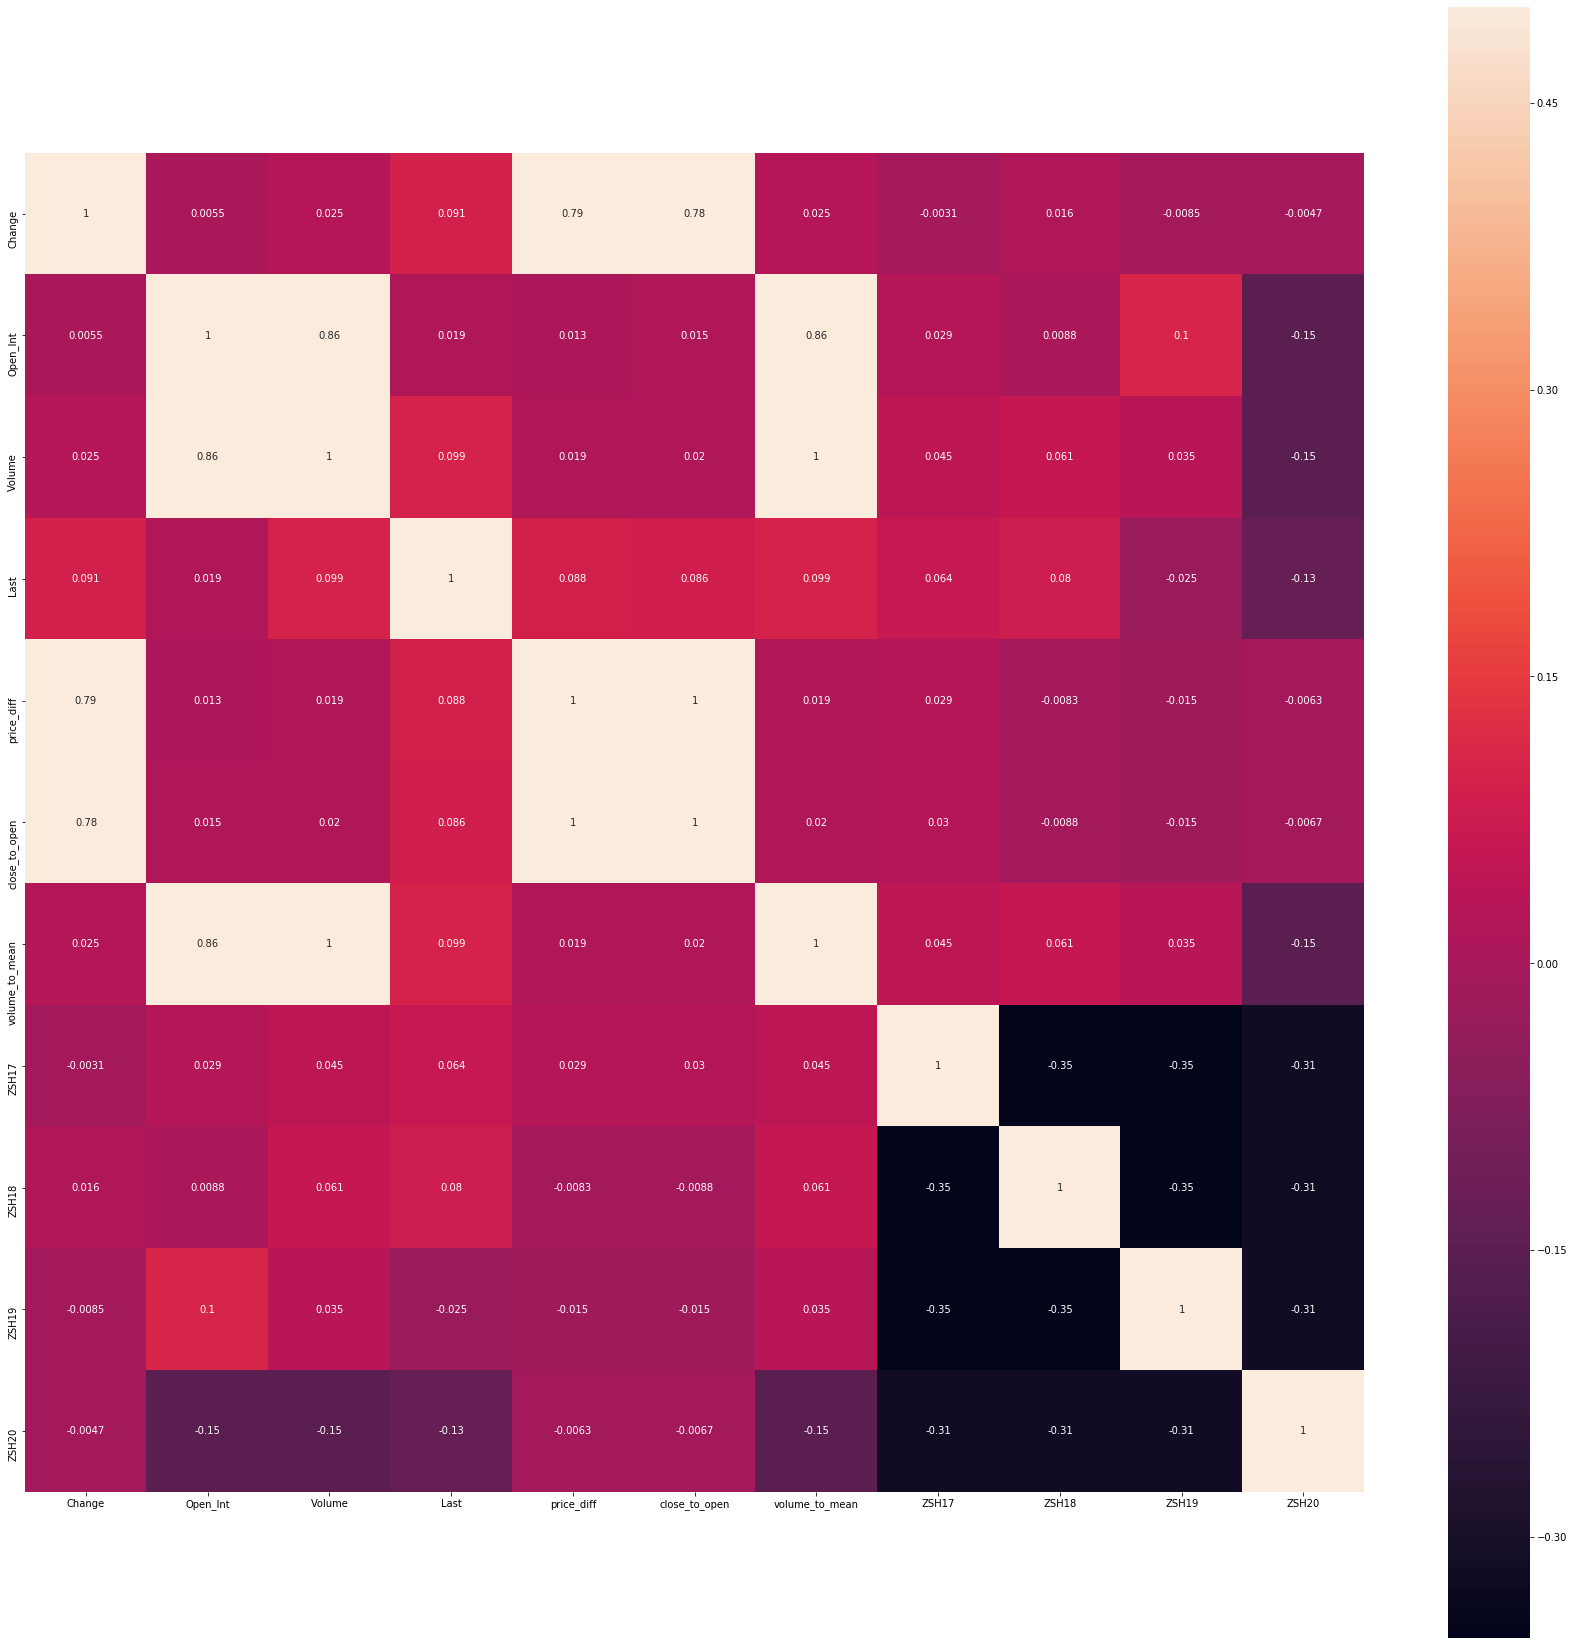

In [197]:
import seaborn as sns
fcol = [c for c in result.columns if c not in ['Time', 'Symbol', 'Open', 'High', 'Low']]
result[fcol].head()

C_mat = result[fcol].corr()
fig = plt.figure(figsize=(30,30))
sns.heatmap(C_mat,vmax=0.5,square=True,annot=True)
plt.show()

In [14]:
# Let's choose our features#
features = ['Open', 'Low', 'High','Last']
    
    #'returnsClosePrev1', 'returnsClosePrev2', 'returnsClosePrev3', 'returnsClosePrev4', 'returnsClosePrev5', 'returnsClosePrev10', 
    #'returnsCloseNext5']

#'returnsCloseNext1', 'returnsCloseNext2', 'returnsCloseNext3', 'returnsCloseNext4', 'returnsCloseNext10'
result = result.dropna()

#Hidden test set
test_set = result[features].head(100)
temp_set = result[features].iloc[100:]
#Validation/train set
val_set = temp_set.head(400)
train_set = temp_set.iloc[400:]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(train_set)
sc.mean_

array([1107.93668686, 1103.20956707, 1113.02405787, 1108.04071332])

In [15]:
train = sc.transform(train_set)
valid = sc.transform(val_set)
test = sc.transform(test_set)

In [16]:
train.shape

(4458, 4)

In [17]:
'''X_train = train[:,0:6]
y_train = train[:,6:7]
X_valid= valid[:,0:6]
y_valid = valid[:,6:7]
X_test = test[:,0:6]
y_test = test[:,6:7]'''

'X_train = train[:,0:6]\ny_train = train[:,6:7]\nX_valid= valid[:,0:6]\ny_valid = valid[:,6:7]\nX_test = test[:,0:6]\ny_test = test[:,6:7]'

In [18]:
def build_timeseries(mat, y_col_index):
    # y_col_index is the index of column that would act as output column
    # total number of time-series samples would be len(mat) - TIME_STEPS
    dim_0 = mat.shape[0] - TIME_STEPS
    dim_1 = mat.shape[1]
    x = np.zeros((dim_0, TIME_STEPS, dim_1))
    y = np.zeros((dim_0,))
    
    for i in range(dim_0):
        x[i] = mat[i:TIME_STEPS+i]
        y[i] = mat[TIME_STEPS+i, y_col_index]
    print("length of time-series i/o",x.shape,y.shape)
    return x, y

def trim_dataset(mat, batch_size):
    """
    trims dataset to a size that's divisible by BATCH_SIZE
    """
    no_of_rows_drop = mat.shape[0]%batch_size
    if(no_of_rows_drop > 0):
        return mat[:-no_of_rows_drop]
    else:
        return mat
    
BATCH_SIZE = 30
TIME_STEPS = 5

x_t, y_t = build_timeseries(train, 3)
x_t = trim_dataset(x_t, BATCH_SIZE)
y_t = trim_dataset(y_t, BATCH_SIZE)
x_temp, y_temp = build_timeseries(valid, 3)
x_val, x_test_t = np.split(trim_dataset(x_temp, BATCH_SIZE),2)
y_val, y_test_t = np.split(trim_dataset(y_temp, BATCH_SIZE),2)

length of time-series i/o (4453, 5, 4) (4453,)
length of time-series i/o (395, 5, 4) (395,)


In [19]:
x_t.shape[2]

4

In [20]:
# Model
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Input, LSTM
from keras.optimizers import Adam

lstm_model = Sequential()
lstm_model.add(LSTM(100, batch_input_shape=(BATCH_SIZE, TIME_STEPS, x_t.shape[2]), dropout=0.0, recurrent_dropout=0.0, stateful=True,     kernel_initializer='random_uniform'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(20,activation='relu'))
lstm_model.add(Dense(1,activation='sigmoid'))
# Compile the architecture and view summary
optimizer = Adam(lr=0.001)
lstm_model.compile(loss='mean_squared_error', optimizer=optimizer)

lstm_model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (30, 100)                 42000     
_________________________________________________________________
dropout_1 (Dropout)          (30, 100)                 0         
_________________________________________________________________
dense_1 (Dense)              (30, 20)                  2020      
_________________________________________________________________
dense_2 (Dense)              (30, 1)                   21        
Total params: 44,041
Trainable params: 44,041
Non-trainable params: 0
_________________________________________________________________


In [21]:
import os
from keras.callbacks import ModelCheckpoint,EarlyStopping, CSVLogger

csv_logger = CSVLogger(os.path.join("./", 'lstm' + '.log'), append=True)

history = lstm_model.fit(x_t, y_t, epochs=150, verbose=2, batch_size=BATCH_SIZE,
                    shuffle=False, validation_data=(trim_dataset(x_val, BATCH_SIZE),
                    trim_dataset(y_val, BATCH_SIZE)), callbacks=[csv_logger])

Train on 4440 samples, validate on 180 samples
Epoch 1/150
 - 1s - loss: 1.0713 - val_loss: 0.9637
Epoch 2/150
 - 0s - loss: 1.0020 - val_loss: 0.9638
Epoch 3/150
 - 0s - loss: 1.0020 - val_loss: 0.9641
Epoch 4/150
 - 0s - loss: 1.0021 - val_loss: 0.9800
Epoch 5/150
 - 0s - loss: 0.8666 - val_loss: 1.1426
Epoch 6/150
 - 0s - loss: 0.5653 - val_loss: 0.9644
Epoch 7/150
 - 0s - loss: 0.5250 - val_loss: 0.9638
Epoch 8/150
 - 0s - loss: 0.5158 - val_loss: 0.9638
Epoch 9/150
 - 0s - loss: 0.5121 - val_loss: 0.9637
Epoch 10/150
 - 0s - loss: 0.5114 - val_loss: 0.9637
Epoch 11/150
 - 0s - loss: 0.5143 - val_loss: 0.9636
Epoch 12/150
 - 1s - loss: 0.5115 - val_loss: 0.9636
Epoch 13/150
 - 0s - loss: 0.5103 - val_loss: 0.9636
Epoch 14/150
 - 0s - loss: 0.5099 - val_loss: 0.9636
Epoch 15/150
 - 0s - loss: 0.5097 - val_loss: 0.9636
Epoch 16/150
 - 0s - loss: 0.5098 - val_loss: 0.9636
Epoch 17/150
 - 0s - loss: 0.5099 - val_loss: 0.9636
Epoch 18/150
 - 0s - loss: 0.5097 - val_loss: 0.9636
Epoch 19

In [22]:
y_pred = model.predict(X_test).reshape(1,-1)[0]
y_pred.shape

NameError: name 'model' is not defined

In [ ]:
y_pred = np.array(y_pred).ravel()
y_test = np.array(y_test).ravel()

In [ ]:
data = {'y_real':y_test,'y_pred':y_pred}
out_compare  = pd.DataFrame(data)
out_compare.head()